In [1]:
# Load packages and libraries

import pandas as pd
import numpy as np
import quandl
import requests
from dotenv import load_dotenv
import os
import alpaca_trade_api as tradeapi
import nasdaqdatalink
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import date
import warnings
import json

# Ignore warnings

warnings.filterwarnings('ignore')

In [2]:
# Function for all graphs

def plot_graph(df, title:str, y_label: str):
    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use("seaborn")

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel("Date")
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="upper left", prop = {"size":10})

    plt.show()

### Weapons Manufacturers' Stock Data

#### The Gulf War

In [3]:
# Get weapons stock data for Gulf War from Yahoo Finance

tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1991-02-28")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

weapons_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Investigate dataframe

weapons_gulf_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
1990-02-01,11.963190,11.963190,11.694785,11.733129,4.849932,163000,LMT
1990-02-02,11.656442,11.924847,11.656442,11.924847,4.929180,399676,LMT
1990-02-05,12.039877,12.078221,11.694785,11.694785,4.834085,421192,LMT
1990-02-06,11.694785,11.694785,11.273006,11.311350,4.675591,262430,LMT
1990-02-07,11.273006,11.388037,11.081288,11.273006,4.659740,567892,LMT


In [5]:
# Convert dataframe to csv and move to Resources folder

# weapons_gulf_df.to_csv("weapons_gulf.csv")
# mv "weapons_gulf.csv" Resources

In [6]:
# Clean up dataframe to include only closing prices

weapons_gulf_df = weapons_gulf_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
weapons_gulf_df = weapons_gulf_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

weapons_gulf_df.head()

ticker,BA,LMT,NOC,RTX
Date,,,,
1990-02-01,20.416668,11.733129,8.075031,3.952958
1990-02-02,20.750000,11.924847,7.962094,3.933291
1990-02-05,21.041668,11.694785,7.905625,3.992291
1990-02-06,21.166668,11.311350,7.679750,3.923458
1990-02-07,21.166668,11.273006,7.905625,3.923458


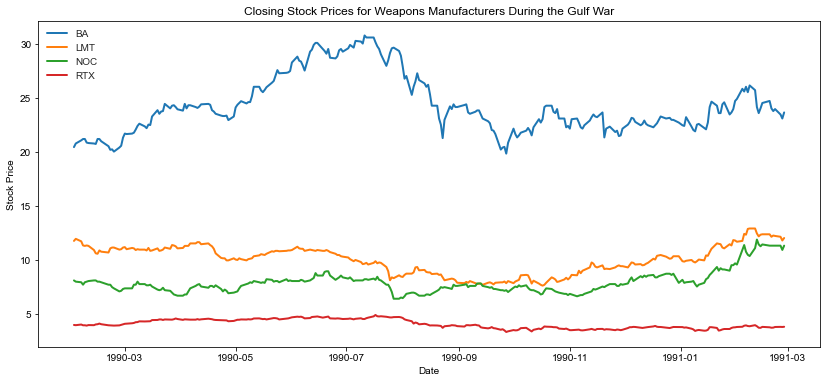

In [7]:
# Plot closing prices

plot_graph(weapons_gulf_df, title="Closing Stock Prices for Weapons Manufacturers During the Gulf War", y_label="Stock Price")

#### The War in Iraq

In [8]:
# Get weapon stock data for the War in Iraq from Yahoo Finance

tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2003-03-01", end="2011-12-31")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

weapons_iraq_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# Investigate dataframe

weapons_iraq_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2003-03-03,46.389999,46.619999,45.700001,45.779999,27.045052,2123500,LMT
2003-03-04,45.790001,46.450001,44.910000,46.080002,27.222282,2535100,LMT
2003-03-05,44.209999,45.900002,42.560001,45.080002,26.631533,4945000,LMT
2003-03-06,45.090000,45.200001,44.090000,44.570000,26.330235,5266300,LMT
2003-03-07,44.570000,44.570000,43.000000,43.560001,25.733570,5048900,LMT


In [10]:
# Convert dataframe to csv and move to Resources folder

# weapons_iraq_df.to_csv("weapons_iraq.csv")
# mv "weapons_iraq.csv" Resources

In [11]:
# Clean up dataframe to include only closing prices

weapons_iraq_df = weapons_iraq_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
weapons_iraq_df = weapons_iraq_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

weapons_iraq_df.head()

ticker,BA,LMT,NOC,RTX
Date,,,,
2003-03-03,27.110001,45.779999,39.130585,18.187538
2003-03-04,27.450001,46.080002,39.419704,17.929516
2003-03-05,26.740000,45.080002,37.834064,17.866583
2003-03-06,26.160000,44.570000,37.974106,17.709251
2003-03-07,25.840000,43.560001,37.373280,17.973568


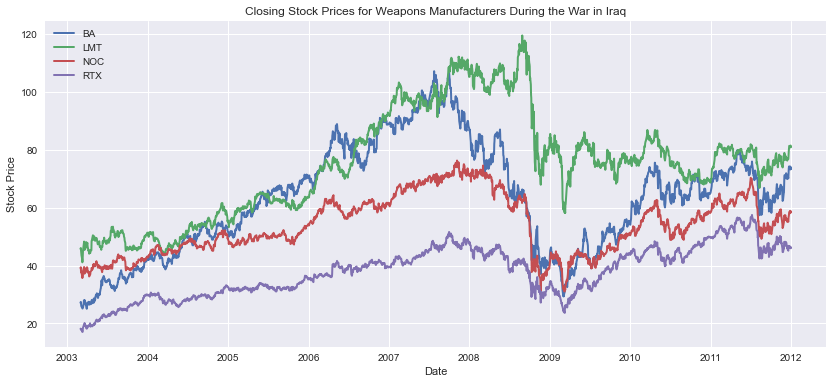

In [12]:
# Plot closing prices

plot_graph(weapons_iraq_df, title="Closing Stock Prices for Weapons Manufacturers During the War in Iraq", y_label="Stock Price")

#### The Russian Invasion of Ukraine

In [13]:
# Get weapon stock data for the Russian Invasion of Ukraine from Yahoo Finance

tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-24", end="2022-06-30")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

weapons_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
# Investigate dataframe

weapons_rusua_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2021-08-24,358.970001,360.489990,357.920013,359.000000,348.898315,822600,LMT
2021-08-25,359.690002,360.649994,357.989990,358.750000,348.655365,953500,LMT
2021-08-26,359.100006,361.980011,357.239990,361.619995,351.444580,1172400,LMT
2021-08-27,363.290009,364.329987,361.179993,361.989990,351.804169,1203900,LMT
2021-08-30,362.250000,363.959991,361.750000,362.049988,351.862488,986000,LMT


In [15]:
# Convert dataframe to csv in Resources folder

# weapons_rusua_df.to_csv("weapons_rusua.csv")
# mv "weapons_rusua.csv" Resources

In [16]:
# Clean up dataframe to include only closing prices

weapons_rusua_df = weapons_rusua_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
weapons_rusua_df = weapons_rusua_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

weapons_rusua_df.head()

ticker,BA,LMT,NOC,RTX
Date,,,,
2021-08-24,221.429993,359.000000,362.769989,85.430000
2021-08-25,221.029999,358.750000,362.660004,85.730003
2021-08-26,216.500000,361.619995,366.760010,84.760002
2021-08-27,221.750000,361.989990,364.839996,85.400002
2021-08-30,217.660004,362.049988,367.619995,84.800003


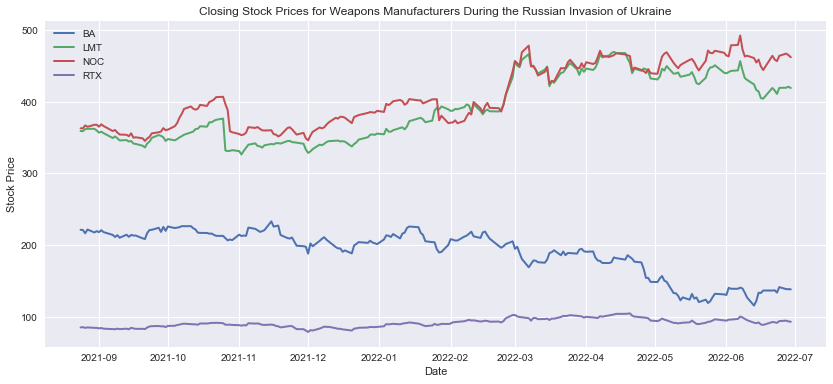

In [17]:
# Plot closing prices

plot_graph(weapons_rusua_df, title="Closing Stock Prices for Weapons Manufacturers During the Russian Invasion of Ukraine", y_label="Stock Price")

### Gas Companies' Stock Data

#### The Gulf War

In [18]:
# Get gas stock data for the Gulf War from Yahoo Finance

tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1990-12-31")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

gas_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
# Investigate dataframe

gas_gulf_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
1990-02-01,11.81250,11.84375,11.75000,11.75000,3.956184,2903200,XOM
1990-02-02,11.78125,11.96875,11.75000,11.96875,4.029835,4246400,XOM
1990-02-05,12.00000,12.09375,11.96875,12.00000,4.040358,5880400,XOM
1990-02-06,11.84375,11.87500,11.56250,11.81250,4.027570,4739600,XOM
1990-02-07,11.75000,12.00000,11.68750,12.00000,4.091502,4108800,XOM


In [20]:
# Convert dataframe to csv and move to Resources folder

# gas_gulf_df.to_csv("gas_gulf.csv")
# mv "gas_gulf.csv" Resources

In [21]:
# Clean up dataframe to include only closing prices

gas_gulf_df = gas_gulf_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gas_gulf_df = gas_gulf_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

gas_gulf_df.head()

ticker,BP,COP,CVX,XOM
Date,,,,
1990-02-01,17.46875,9.767181,16.65625,11.75000
1990-02-02,17.50000,9.767181,16.78125,11.96875
1990-02-05,17.56250,9.767181,16.87500,12.00000
1990-02-06,17.50000,9.862470,16.78125,11.81250
1990-02-07,17.40625,9.957760,16.96875,12.00000


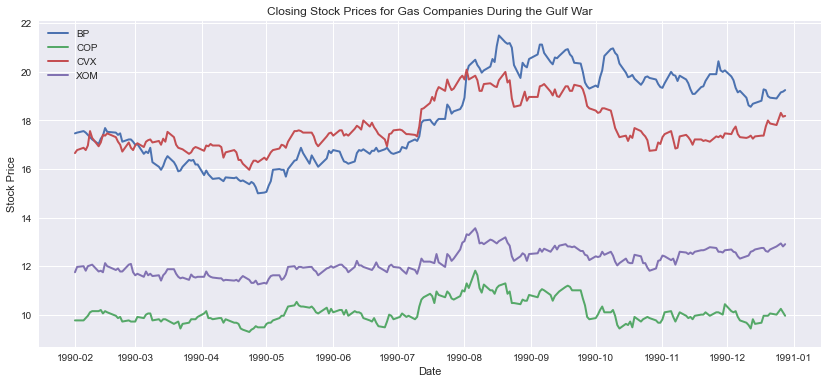

In [22]:
# Plot closing prices

plot_graph(gas_gulf_df, title="Closing Stock Prices for Gas Companies During the Gulf War", y_label="Stock Price")

#### The War in Iraq

In [23]:
# Get gas stock data for the Iraq War from Yahoo Finance

tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2003-03-01", end="2011-12-31")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

gas_iraq_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
# Investigate dataframe

gas_iraq_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2003-03-03,34.389999,34.730000,34.200001,34.459999,18.463024,12094000,XOM
2003-03-04,34.700001,34.740002,34.169998,34.230000,18.339794,10453100,XOM
2003-03-05,34.230000,34.919998,34.220001,34.919998,18.709482,12192000,XOM
2003-03-06,34.750000,34.860001,34.410000,34.560001,18.516596,12140800,XOM
2003-03-07,34.099998,34.880001,34.080002,34.790001,18.639832,13199300,XOM


In [25]:
# Convert dataframe to csv and move to Resources folder

# gas_iraq_df.to_csv("gas_iraq.csv")
# mv "gas_iraq.csv" Resources

In [26]:
# Clean up dataframe to include only closing prices

gas_iraq_df = gas_iraq_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gas_iraq_df = gas_iraq_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

gas_iraq_df.head()

ticker,BP,COP,CVX,XOM
Date,,,,
2003-03-03,39.279999,19.724941,32.270000,34.459999
2003-03-04,39.340000,19.629650,32.325001,34.230000
2003-03-05,39.270000,19.583912,32.974998,34.919998
2003-03-06,39.099998,19.366652,32.689999,34.560001
2003-03-07,38.860001,19.667767,32.630001,34.790001


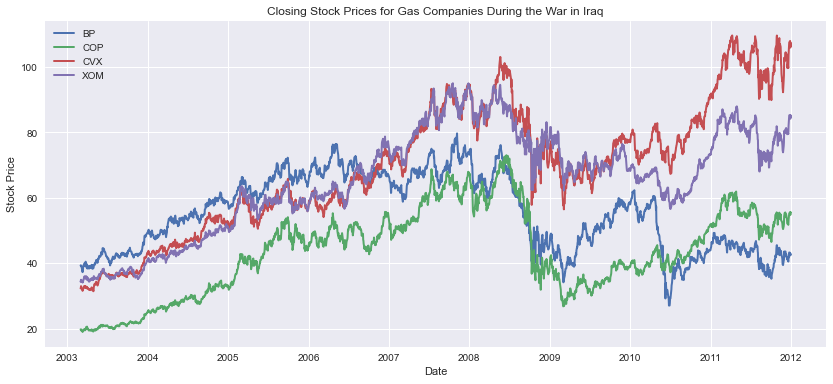

In [27]:
# Plot closing prices

plot_graph(gas_iraq_df, title="Closing Stock Prices for Gas Companies During the War in Iraq", y_label="Stock Price")

#### The Russian Invasion of Ukraine

In [28]:
# Get gas stock data for the Russian Invasion of Ukraine from Yahoo Finance

tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-24", end="2022-06-30")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

gas_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
# Investigate dataframe

gas_rusua_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2021-08-24,55.290001,55.849998,55.009998,55.360001,53.479134,17915600,XOM
2021-08-25,55.240002,55.770000,54.869999,55.459999,53.575729,13270300,XOM
2021-08-26,55.200001,55.540001,54.630001,54.709999,52.851212,11842600,XOM
2021-08-27,55.400002,56.209999,55.400002,55.770000,53.875202,15822500,XOM
2021-08-30,56.240002,56.340000,55.119999,55.160000,53.285927,14086100,XOM


In [30]:
# Convert dataframe to csv in Resources folder

# gas_rusua_df.to_csv("gas_rusua.csv")
# mv "gas_rusua.csv" Resources

In [31]:
# Clean up dataframe to include only closing prices

gas_rusua_df = gas_rusua_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gas_rusua_df = gas_rusua_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe 
gas_rusua_df.head()

ticker,BP,COP,CVX,XOM
Date,,,,
2021-08-24,24.650000,55.410000,97.839996,55.360001
2021-08-25,24.629999,56.020000,98.510002,55.459999
2021-08-26,24.299999,55.130001,97.220001,54.709999
2021-08-27,24.940001,56.740002,98.639999,55.770000
2021-08-30,24.700001,56.200001,98.389999,55.160000


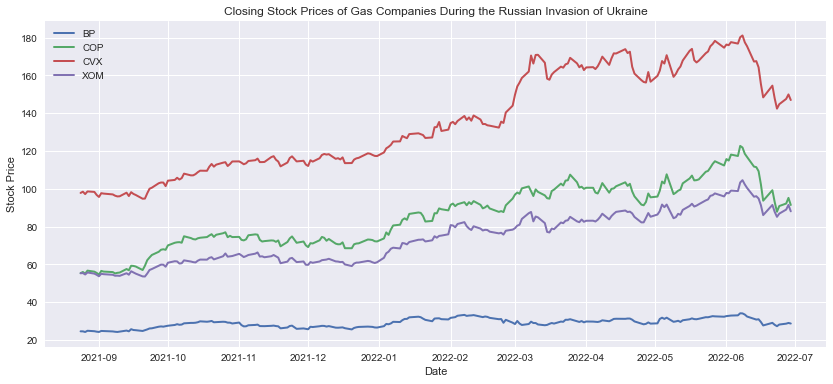

In [32]:
# Plot closing prices

plot_graph(gas_rusua_df, title="Closing Stock Prices of Gas Companies During the Russian Invasion of Ukraine", y_label="Stock Price")

### Crude Oil Prices Data

In [33]:
# Import crude oil prices from csv in Resources folder

crude_df = pd.read_csv("Resources/Cushing_OK_WTI_Spot_Price_FOB.csv")
crude_df = crude_df.rename(columns={"Cushing OK WTI Spot Price FOB Dollars per Barrel":"WTI in Dollars Per Barrel"})

In [34]:
# Check for null values

crude_df.isnull().sum()

Month                        0
WTI in Dollars Per Barrel    0
dtype: int64

In [35]:
# Investigate dataframe

crude_df.head()

,Month,WTI in Dollars Per Barrel
0,Jun 2022,114.84
1,May 2022,109.55
2,Apr 2022,101.78
3,Mar 2022,108.50
4,Feb 2022,91.64


In [36]:
# Change "Month" column to datetime object

crude_df["Month"]=pd.to_datetime(crude_df["Month"])

# Set "Month" as the index

crude_df.set_index("Month", inplace=True)

In [37]:
# Investigate dataframe

crude_df.head()

,WTI in Dollars Per Barrel
Month,
2022-06-01,114.84
2022-05-01,109.55
2022-04-01,101.78
2022-03-01,108.50
2022-02-01,91.64


#### The Gulf War

In [38]:
# Create dataframe for oil prices during the Gulf War

gulf_oil_df = crude_df.loc["Feb 1990":"Dec 1990"]

# Investigate dataframe

gulf_oil_df.head()

,WTI in Dollars Per Barrel
Month,
1990-12-01,27.28
1990-11-01,32.33
1990-10-01,36.04
1990-09-01,33.51
1990-08-01,27.31


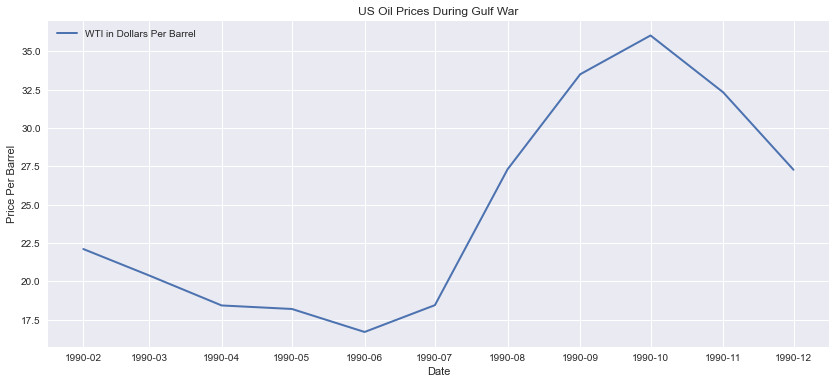

In [39]:
# Plot the prices

plot_graph(gulf_oil_df, title="US Oil Prices During Gulf War", y_label="Price Per Barrel")

#### The War in Iraq

In [40]:
# Create dataframe for oil prices during the War in Iraq

iraq_oil_df = crude_df.loc["Mar 2003":"Dec 2011"]

# Investigate dataframe

iraq_oil_df.head()

,WTI in Dollars Per Barrel
Month,
2011-12-01,98.56
2011-11-01,97.16
2011-10-01,86.32
2011-09-01,85.52
2011-08-01,86.33


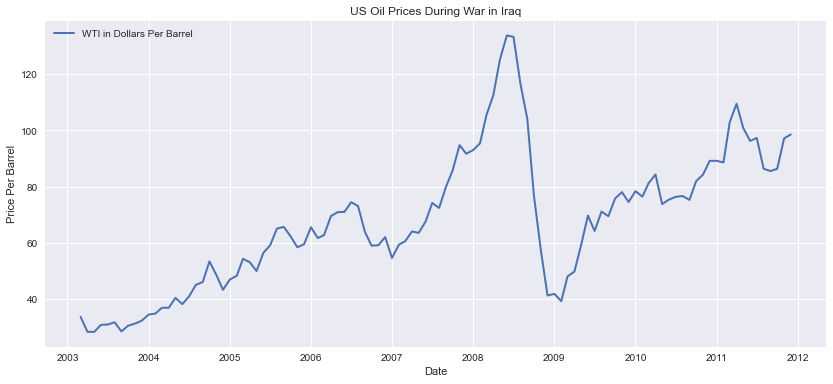

In [41]:
# Plot the prices

plot_graph(iraq_oil_df, title="US Oil Prices During War in Iraq", y_label="Price Per Barrel")

#### The Russian Invasion of Ukraine

In [42]:
# Create dataframe for oil prices during the Russian Invasion of Ukraine

rus_ua_oil_df = crude_df.iloc[0:11,:]

# Investigate dataframe

rus_ua_oil_df.head()

,WTI in Dollars Per Barrel
Month,
2022-06-01,114.84
2022-05-01,109.55
2022-04-01,101.78
2022-03-01,108.50
2022-02-01,91.64


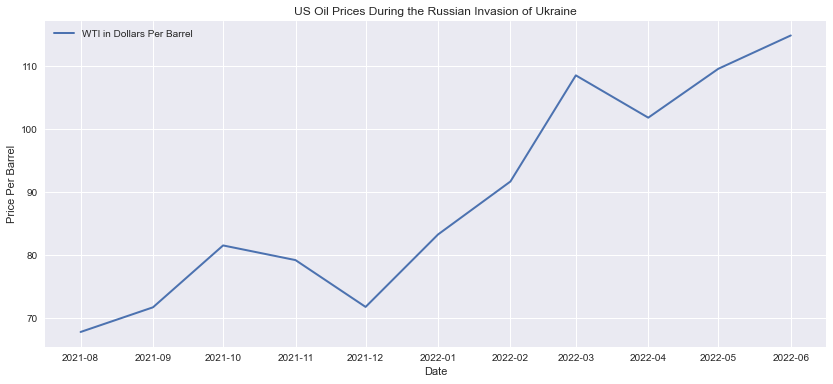

In [43]:
# Plot the prices

plot_graph(rus_ua_oil_df, title="US Oil Prices During the Russian Invasion of Ukraine", y_label="Price Per Barrel")

### Housing Prices Data

In [44]:
# Load the .env environment variables

load_dotenv()

True

In [45]:
# Get the environment variables

q_API_KEY = os.getenv("QUANDL_API_KEY")

# Set up the API key

quandl.ApiConfig.api_key = q_API_KEY

#### The Russian Invasion of Ukraine

In [46]:
# Connect to Zillow via Quandl to get U.S. housing prices during the Russian Invasion of Ukraine

zillow_indicators = quandl.get_table("ZILLOW/INDICATORS", paginate=True)

# Investigate dataframe

zillow_indicators

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [47]:
# Clean up dataframe to retrieve only "Home values" category

mask = zillow_indicators['category']=='Home values'

home_values_ind = zillow_indicators[mask]

# Investigate dataframe

home_values_ind

## This dataframe describes the indicators present in the data set. We are going to use 
## the ZALL indicator_id (ZHVI All Homes(SFR, Condo/Co-op))

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [48]:
# Get the regions of the U.S. available on the Zillow API

zillow_regions = quandl.get_table('ZILLOW/REGIONS', paginate= True)

# Investigate dataframe

zillow_regions

,region_id,region_type,region
None,,,
0,99999,zip,98847; WA; Wenatchee; Chelan County; Peshastin
1,99998,zip,98846; WA; Okanogan County; Pateros
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844; WA; Okanogan County; Oroville
4,99995,zip,98843; WA; Wenatchee; Douglas County; Orondo
...,...,...,...
79247,100000,zip,98848; WA; Moses Lake; Grant County; Quincy
79248,10000,city,Bloomington; MD; Garrett County
79249,1000,county,Echols County; GA; Valdosta


In [49]:
# All the States in the U.S.

states = ['IA', 'KS', 'UT', 'VA', 'NC', 'NE', 'SD', 'AL', 'ID', 'FM', 'DE', 'AK', 'CT', 'PR', 'NM', 'MS', 'PW', 'CO', 'NJ', 'FL', 'MN', 'VI', 'NV', 'AZ', 'WI', 'ND', 'PA', 'OK', 'KY', 'RI', 'NH', 'MO', 'ME', 'VT', 'GA', 'GU', 'AS', 'NY', 'CA', 'HI', 'IL', 'TN', 'MA', 'OH', 'MD', 'MI', 'WY', 'WA', 'OR', 'MH', 'SC', 'IN', 'LA', 'MP', 'DC', 'MT', 'AR', 'WV', 'TX']

## The "region" column is a list of strings. We will use the "zip" type in the "region_type" column to find the state in which
## the region exists.

In [50]:
# Function to get the states in the "region" column

def state_check(search_field): 
    # Separate the search field data set into a list
    search_field = [elem.strip() for elem in search_field.split(";")]
    
    for elem in search_field:
        if elem in states: 
            return elem

In [51]:
# Create a new "state" field using "zip" in "region_type" column

mask = zillow_regions['region_type']=='zip'
zillow_regions_zip = zillow_regions[mask].copy()

In [52]:
# Create a new "state" column using the state_check function

zillow_regions_zip['state'] = zillow_regions_zip.apply(lambda x: state_check(x['region']), axis =1)

# Investigate dataframe

zillow_regions_zip.head()

,region_id,region_type,region,state
None,,,,
0,99999,zip,98847; WA; Wenatchee; Chelan County; Peshastin,WA
1,99998,zip,98846; WA; Okanogan County; Pateros,WA
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades,WA
3,99996,zip,98844; WA; Okanogan County; Oroville,WA
4,99995,zip,98843; WA; Wenatchee; Douglas County; Orondo,WA


#### The following function serves as a loop to get the housing market prices for all the states. Since each state could have several region_ids in excess of 1000, use a random sample of 30 from each state to calculate the average housing prices of each state. This part might take some time and therefore you should give it about 5-10 minutes to complete. The function will print out the iteration number to show its progress. Ends at iteration 58.

In [53]:
for id_, state in enumerate(states):
    
    # Get the rows with the current state value
    mask = zillow_regions_zip['state']==state
    
    # Filter the rows out in the dataframe
    zillow_ak = zillow_regions_zip[mask]
    
    # Get the region_ids for that particular state
    region_ids = zillow_ak['region_id'].unique()
    
    # Investigate the progress
    print(id)
    
    # Create a list of the region ids so as to get that with those particular IDs
    ids = list(region_ids)
    
    # Check if ids are > 100 since we are only going to pick a random sample of 100
    if len(ids)>100:
        r_ids = random.sample(ids, 30)
    elif len(ids)==0:
        continue
    else: 
        r_ids = ids
    
    # Get the dataframe containing the housing prices using the ZALL indicator_id from the home_values_ind  dataframe

    df = quandl.get_table('ZILLOW/DATA', indicator_id="ZALL", region_id=r_ids , paginate = True)
    
    # Group the "value" by date and then finding the average
    
    data = df.groupby(['date'])['value'].mean()
    
    # Check if it is the first iteration
    
    if id_==0: 
        data_df = pd.DataFrame(data)
        data_df.rename(columns = {'value': state}, inplace = True)
        data_df.reset_index(inplace = True)
    else:
        new_df = pd.DataFrame(data)
        new_df.rename(columns = {'value': state}, inplace = True)
        new_df.reset_index(inplace = True)
        data_df = pd.merge(data_df, new_df, how = 'left')

<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in f

In [54]:
# Investigate dataframe

data_df.head()

,date,IA,KS,UT,VA,NC,NE,SD,AL,ID,...,WA,OR,SC,IN,LA,DC,MT,AR,WV,TX
0,1996-01-31,99273.00,NaN,203837.111111,169595.888889,93579.285714,116947.00,NaN,93648.75,76239.5,...,146477.000000,136458.800000,76129.500,100370.000000,161109.5,152310.8,NaN,68340.705882,65805.500000,145188.00
1,1996-02-29,99094.25,NaN,201797.000000,169682.555556,93797.571429,117173.75,NaN,93920.75,75902.0,...,146542.125000,136705.733333,76357.125,87656.500000,160724.0,151765.6,NaN,65799.444444,65802.833333,145759.25
2,1996-03-31,98852.25,NaN,202522.700000,169818.333333,94189.285714,117253.75,NaN,94188.50,75818.0,...,146677.125000,136789.333333,76543.125,87257.500000,160225.0,151237.8,NaN,65879.833333,65785.166667,145929.25
3,1996-04-30,98507.50,NaN,203504.300000,170271.777778,94786.285714,117398.75,NaN,94694.00,76089.5,...,146843.312500,136863.600000,76988.250,87084.000000,159314.0,150691.0,NaN,65997.055556,65808.500000,146693.00
4,1996-05-31,98362.25,NaN,199511.454545,170549.888889,95493.285714,117435.25,NaN,95085.75,76506.5,...,144203.235294,136712.466667,77442.875,73128.666667,158167.0,150246.0,NaN,66180.555556,65833.000000,147415.75


In [55]:
# Get housing prices during the Russian Invasion of Ukraine 

mask = data_df['date']>="2021-08-01"

# Create dataframe

ukr_rus_df = data_df[mask].copy()
ukr_rus_df = ukr_rus_df.round(2)

# Calculate the national average

ukr_rus_df['national_average'] = ukr_rus_df.mean(axis=1).round(2)
ukr_rus_df['national_median'] = ukr_rus_df.median(axis=1).round(2)

# Investigate dataframe

ukr_rus_df.head()

,date,IA,KS,UT,VA,NC,NE,SD,AL,ID,...,SC,IN,LA,DC,MT,AR,WV,TX,national_average,national_median
307,2021-08-31,149131.00,129754.93,417474.03,249339.97,182977.47,195085.89,224788.72,158292.53,369326.38,...,161798.75,171355.2,187711.67,671672.88,328148.97,118234.97,94463.07,227698.07,284885.51,246135.78
308,2021-09-30,150400.21,131510.74,424404.79,251469.83,190931.04,196677.07,226771.88,160106.93,375013.10,...,165614.00,173262.7,189136.70,670978.50,333873.38,119360.77,94748.48,231195.82,288801.91,249101.26
309,2021-10-31,151349.86,133205.70,431396.24,253092.63,188372.23,198109.36,229281.32,161735.97,379497.17,...,168433.21,175159.0,190543.19,672519.00,338510.97,120635.20,95121.66,233690.29,291950.36,251490.52
310,2021-11-30,152461.55,134381.59,436651.45,252666.14,190860.53,199943.43,231163.88,163509.30,381781.34,...,170962.28,177031.0,191919.81,671411.12,341629.62,121864.00,95581.76,235740.43,294758.35,252522.50
311,2021-12-31,154044.21,135890.00,444610.93,256526.37,194970.90,203435.86,234978.68,166047.20,390179.79,...,173896.59,179654.6,194473.96,671481.88,348107.17,124067.87,94612.18,237427.26,298566.09,256325.88


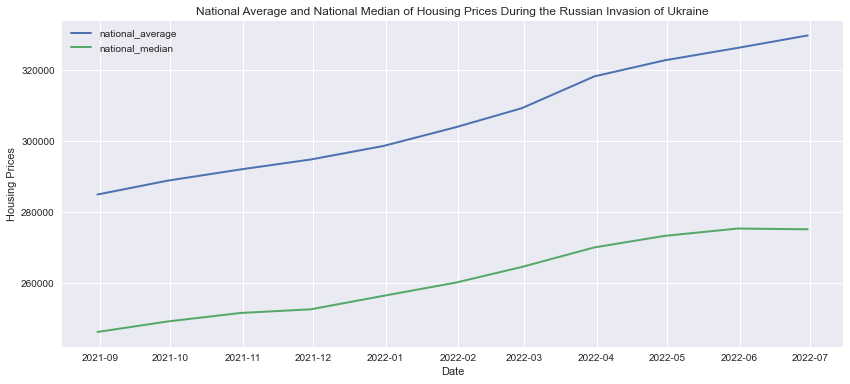

In [56]:
# Plot the national average and national median

ukr_rus_plot_df = ukr_rus_df.set_index('date')

cols =['national_average', 'national_median']

fig,ax = plt.subplots(1,1, figsize = (14,6))
plt.style.use('seaborn')

for c in cols: 
    ax.plot(c, linewidth=2, data=ukr_rus_plot_df)
    ax.set_title('National Average and National Median of Housing Prices During the Russian Invasion of Ukraine')
    plt.xlabel('Date')
    plt.ylabel('Housing Prices')

    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left', prop = {"size":10})

plt.show()

#### The Gulf War

In [57]:
# Import housing prices from Federal Reserve Economic Data csv in Resources folder

df = pd.read_csv("Resources/gulf_war_index.csv")

# Investigate dataframe

df.head()

,observation_date,QUSR628BIS
0,1970-01-01,60.8903
1,1970-04-01,60.3328
2,1970-07-01,60.6021
3,1970-10-01,60.5464
4,1971-01-01,61.7321


In [58]:
# Clean up dataframe

df['observation_date'] = pd.to_datetime(df['observation_date'])
df.rename(columns = {'QUSR628BIS': 'quarterly_housing_prices'}, inplace = True)

# Investigate dataframe

df.head()

,observation_date,quarterly_housing_prices
0,1970-01-01,60.8903
1,1970-04-01,60.3328
2,1970-07-01,60.6021
3,1970-10-01,60.5464
4,1971-01-01,61.7321


In [59]:
# Create dataframe for housing prices during the Gulf War

mask1 = df['observation_date'] >= "1990-01-01"
mask2 = df['observation_date'] <= "1991-03-01"
mask = mask1&mask2
gulf_df = df[mask]

# Investigate dataframe

gulf_df

,observation_date,quarterly_housing_prices
80,1990-01-01,93.8162
81,1990-04-01,93.1032
82,1990-07-01,91.2690
83,1990-10-01,89.3036
84,1991-01-01,88.1170


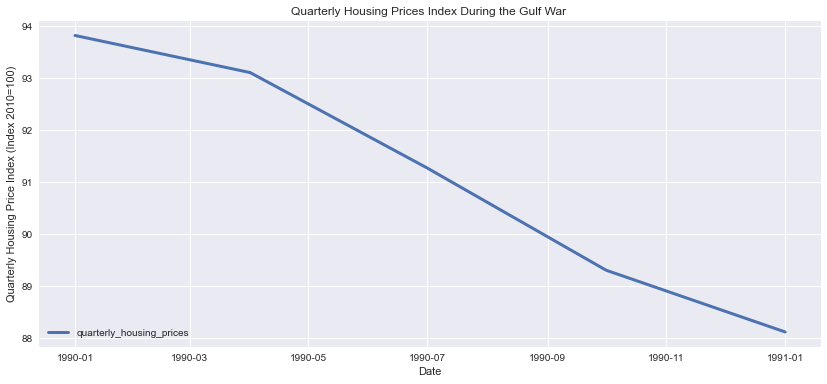

In [60]:
# Plot the quartely pricing index

gulf_plot_df = gulf_df.set_index('observation_date')

fig,ax = plt.subplots(1,1, figsize = (14,6))
plt.style.use('seaborn')

ax.plot('quarterly_housing_prices', linewidth=3, data=gulf_plot_df)
ax.set_title('Quarterly Housing Prices Index During the Gulf War ')
plt.xlabel('Date')
plt.ylabel('Quarterly Housing Price Index (Index 2010=100)')

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower left', prop = {"size":10})

plt.show()

#### The War in Iraq

In [61]:
# Create dataframe for housing prices during the War in Iraq

mask1 = df['observation_date'] >= "2003-04-01"
mask2 = df['observation_date'] <= "2012-01-01"
mask = mask1&mask2
iraq_df = df[mask]

# Investigate dataframe

iraq_df

,observation_date,quarterly_housing_prices
133,2003-04-01,116.1994
134,2003-07-01,118.9464
135,2003-10-01,122.7670
136,2004-01-01,125.8849
137,2004-04-01,128.9512
138,2004-07-01,133.0457
139,2004-10-01,137.0434
140,2005-01-01,141.7703
141,2005-04-01,145.5324
142,2005-07-01,148.7909


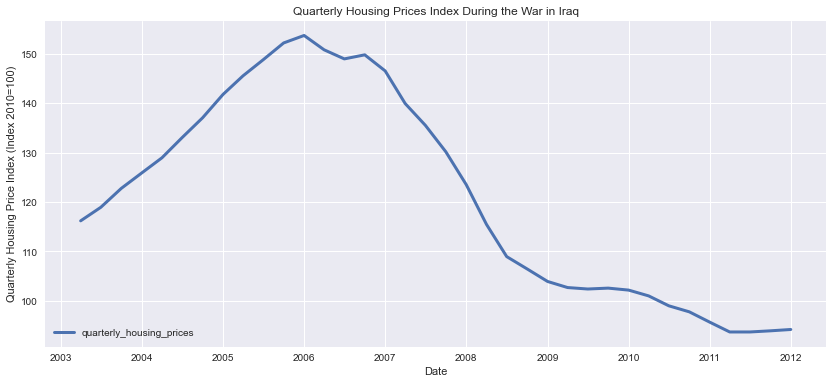

In [62]:
# Plot the quartely pricing index

iraq_plot_df = iraq_df.set_index('observation_date')

fig,ax = plt.subplots(1,1, figsize = (14,6))
plt.style.use('seaborn')

ax.plot('quarterly_housing_prices', linewidth=3, data=iraq_plot_df)
ax.set_title('Quarterly Housing Prices Index During the War in Iraq')
plt.xlabel('Date')
plt.ylabel('Quarterly Housing Price Index (Index 2010=100)')

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower left', prop = {"size":10})

plt.show()

### Unemployment Rate Data

#### The Gulf War

In [63]:
# Get unemployment rate data from the Federal Reserve Economic Data API

gulf_unemp_df = quandl.get(["FRED/UNRATE", "FRED/UNEMPLOY"], trim_start = "1990-02-1", trim_end="1990-12-31", collapse = 'monthly')
gulf_unemp_df.columns = ['Gulf_unemploy_rate', 'Gulf_unemploy_level']

# Investigate dataframe

gulf_unemp_df

,Gulf_unemploy_rate,Gulf_unemploy_level
Date,,
1990-02-28,5.3,6651.0
1990-03-31,5.2,6598.0
1990-04-30,5.4,6797.0
1990-05-31,5.4,6742.0
1990-06-30,5.2,6590.0
1990-07-31,5.5,6922.0
1990-08-31,5.7,7188.0
1990-09-30,5.9,7368.0
1990-10-31,5.9,7459.0


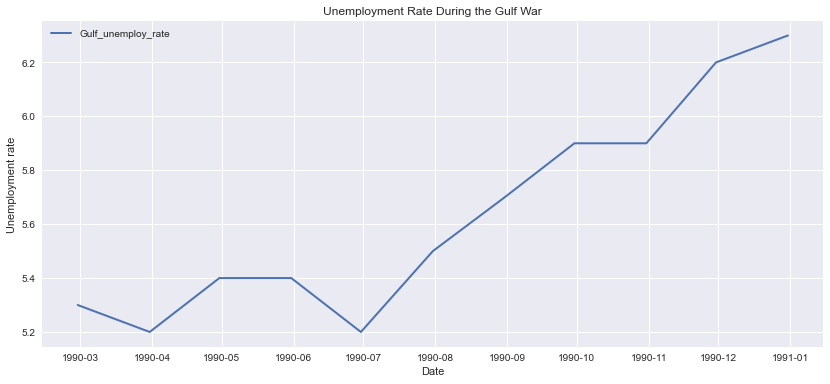

In [64]:
# Plot rates

gulf_unemp_df = gulf_unemp_df[['Gulf_unemploy_rate']].copy()
plot_graph(gulf_unemp_df, title="Unemployment Rate During the Gulf War", y_label="Unemployment rate")

#### The War in Iraq

In [65]:
# Get unemployment rate data from the Federal Reserve Economic Data API

iraq_unemp_df = quandl.get(["FRED/UNRATE", "FRED/UNEMPLOY"], trim_start = "2003-03-01", trim_end="2011-12-31", collapse = 'monthly')
iraq_unemp_df.columns = ['Iraq_unemploy_rate', 'Iraq_unemploy_level']

# Investigate dataframe

iraq_unemp_df

,Iraq_unemploy_rate,Iraq_unemploy_level
Date,,
2003-03-31,5.9,8588.0
2003-04-30,6.0,8842.0
2003-05-31,6.1,8957.0
2003-06-30,6.3,9266.0
2003-07-31,6.2,9011.0
...,...,...
2011-08-31,9.0,13818.0
2011-09-30,9.0,13948.0
2011-10-31,8.8,13594.0


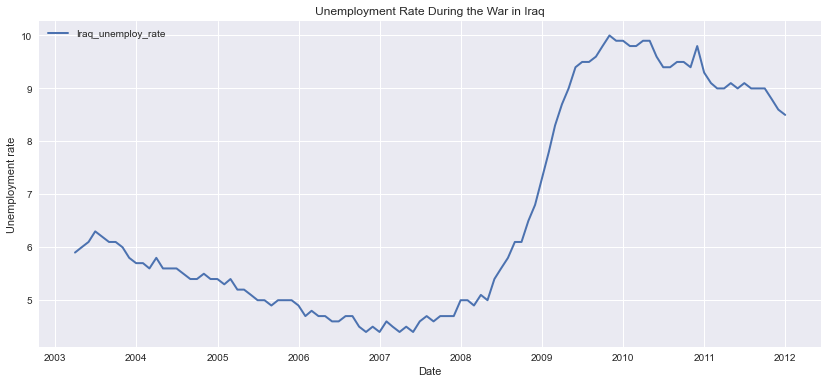

In [66]:
# Plot rates

iraq_unemp_df = iraq_unemp_df[['Iraq_unemploy_rate']].copy()
plot_graph(iraq_unemp_df, title="Unemployment Rate During the War in Iraq", y_label="Unemployment rate")

#### The Russian Invasion of Ukraine

In [67]:
# Get unemployment rate data from the Bureau of Labor Statistics

headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2021", "endyear":"2022"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

data_list = []
for series in json_data['Results']['series']:
    
    seriesId = series['seriesID']
    
    data = series['data']
    
    for datum in data: 
        
        data = {'year':datum['year'],'month':datum['periodName'], 'value':datum['value']}
        data_list.append(data)
    
rus_unemp_df = pd.DataFrame(data_list)

# Investigate dataframe

rus_unemp_df

,year,month,value
0,2022,July,3.5
1,2022,June,3.6
2,2022,May,3.6
3,2022,April,3.6
4,2022,March,3.6
5,2022,February,3.8
6,2022,January,4.0
7,2021,December,3.9
8,2021,November,4.2
9,2021,October,4.6


In [68]:
# Create the date column, renaming the value column and creating a dataframe with the date and unemployment rate columns only

rus_unemp_df['date'] = pd.to_datetime(rus_unemp_df['year']+"-"+rus_unemp_df['month']+"-"+"01")
rus_unemp_df.rename(columns = {'value': 'unemployment_rate'}, inplace= True)
rus_unemp_df = rus_unemp_df[['date', 'unemployment_rate']].copy()

# Investigate dataframe

rus_unemp_df

,date,unemployment_rate
0,2022-07-01,3.5
1,2022-06-01,3.6
2,2022-05-01,3.6
3,2022-04-01,3.6
4,2022-03-01,3.6
5,2022-02-01,3.8
6,2022-01-01,4.0
7,2021-12-01,3.9
8,2021-11-01,4.2
9,2021-10-01,4.6


In [69]:
# Filter out the dates before 2021-07-1

mask = rus_unemp_df['date'] > '2021-07-1'
rus_final_df = rus_unemp_df[mask]

# Setting the date as the index 

rus_final_df.set_index('date', inplace = True)

# Investigate dataframe

rus_final_df

,unemployment_rate
date,
2022-07-01,3.5
2022-06-01,3.6
2022-05-01,3.6
2022-04-01,3.6
2022-03-01,3.6
2022-02-01,3.8
2022-01-01,4.0
2021-12-01,3.9
2021-11-01,4.2


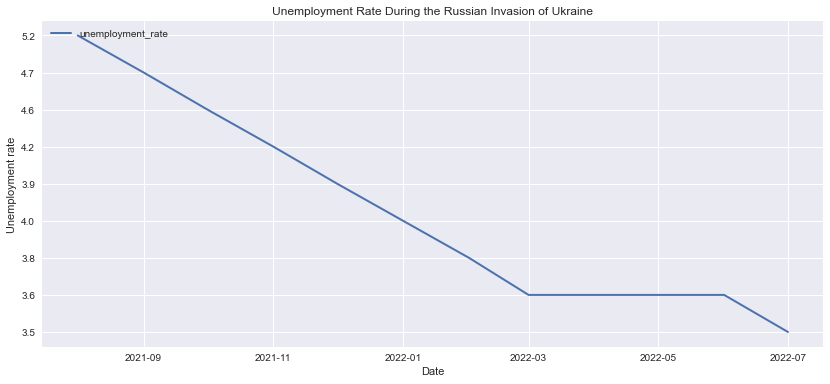

In [70]:
# Plot rates

plot_graph(rus_final_df, title="Unemployment Rate During the Russian Invasion of Ukraine", y_label="Unemployment rate")

### Inflation Rate Data

### Interest Rate Data